In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'C:\Users\dorot\OneDrive\Documents\Grad School\BU\warehouseinvdata.csv')

In [9]:
data

,location_code,week,average_inventory,forecast10,forecast9,forecast8,forecast7,forecast6,forecast5,forecast4,forecast3,forecast2,forecast1
0,4011,4/20/2025,339,156,149,149,220,142,130,138,162,150,432
1,4011,4/27/2025,349,150,151,221,143,131,137,164,149,431,187
2,4011,5/4/2025,211,151,219,142,131,138,166,152,433,188,181
3,4011,5/11/2025,426,222,143,132,136,164,151,432,189,182,244
4,4011,5/18/2025,478,142,132,137,163,154,432,187,180,245,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,7668,6/15/2025,374,540,537,496,477,483,486,477,576,578,594
698,7668,6/22/2025,411,523,491,470,478,479,474,521,573,573,579
699,7668,6/29/2025,382,494,465,471,464,460,496,495,550,556,568
700,7668,7/6/2025,403,475,478,470,464,493,494,497,555,562,572


In [11]:
print(data.dtypes)

location_code         int64
week                 object
average_inventory     int64
forecast10            int64
forecast9             int64
forecast8             int64
forecast7             int64
forecast6             int64
forecast5             int64
forecast4             int64
forecast3             int64
forecast2             int64
forecast1             int64
dtype: object


In [22]:
df = pd.DataFrame(data)[data['location_code'] == 4013]

In [24]:
df

,location_code,week,average_inventory,forecast10,forecast9,forecast8,forecast7,forecast6,forecast5,forecast4,forecast3,forecast2,forecast1
13,4013,4/20/2025,16686,15054,14858,17109,20270,17337,17238,18267,20290,20923,18030
14,4013,4/27/2025,15675,14830,16553,16852,14192,14896,15034,15783,17952,17181,18797
15,4013,5/4/2025,15963,16132,16262,14107,14260,14811,15679,17444,16809,18824,18567
16,4013,5/11/2025,16134,16358,14492,14502,14997,15417,18216,17890,19223,18554,19588
17,4013,5/18/2025,16962,14557,13745,16417,16864,17807,17990,19422,18669,19933,19170
18,4013,5/25/2025,16762,14103,16011,17621,18251,17978,20508,19587,20385,19799,19521
19,4013,6/1/2025,17962,15034,15858,16921,17418,19660,19215,19333,19258,19454,16728
20,4013,6/8/2025,18631,17185,17911,18815,19339,19116,19503,19148,20313,17772,17390
21,4013,6/15/2025,17923,17645,19416,19715,19746,19508,19788,20946,18504,18308,19126
22,4013,6/22/2025,18869,20243,20133,20146,21007,21172,21516,19670,19223,20036,18871


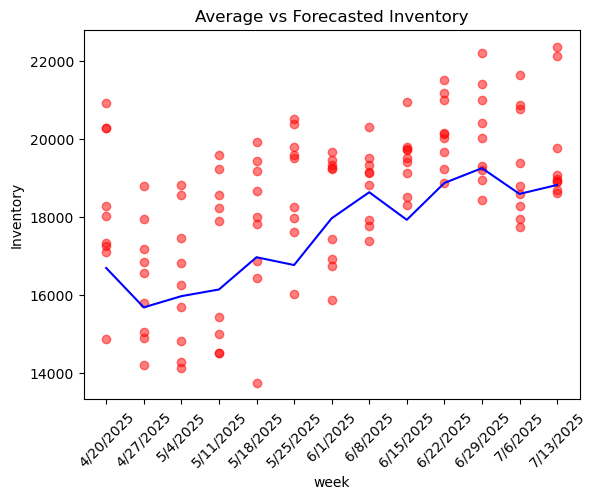

In [26]:
plt.plot(df['week'],df['average_inventory'],label='Actual Inventory', color = 'blue')
for i in range(1,10):
    plt.scatter(df['week'], df[f'forecast{i}'], label = f'forecast {i}', alpha =0.5, color='red')
plt.xlabel('week')
plt.ylabel('Inventory')
plt.title('Average vs Forecasted Inventory')
plt.xticks(rotation = 45)
plt.show()

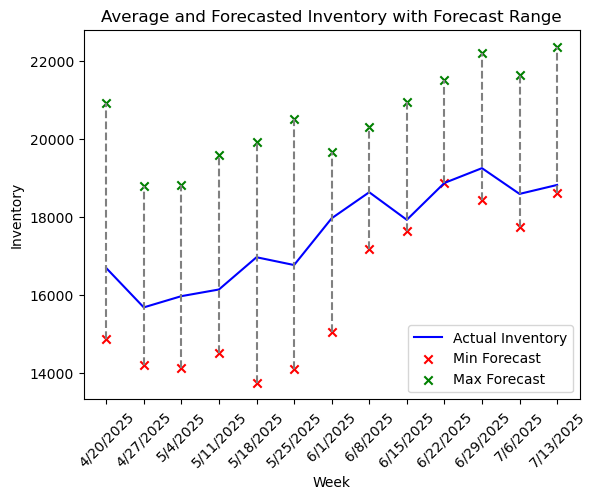

In [28]:
#Calculate the min and max of forecasted values for each week
forecast_data = df[['forecast1','forecast2','forecast3','forecast4','forecast5','forecast6','forecast7','forecast8','forecast9','forecast10']]

forecast_min = forecast_data.min(axis=1)
forecast_max = forecast_data.max(axis=1)

#plot actual inventory as a line with error bars
plt.plot(df['week'], df['average_inventory'], label ='Actual Inventory', color = 'blue')

#add cross markers at the max and min for each error bar
plt.scatter(df['week'], forecast_min, color='red', marker='x', label ='Min Forecast')
plt.scatter(df['week'], forecast_max, color='green', marker ='x', label='Max Forecast')

#Draw vertical lines connecting min and max forecast values
for i in range(len(df)):
    plt.vlines(x=df['week'].iloc[i], ymin=forecast_min.iloc[i], ymax=forecast_max.iloc[i], color='gray', linestyle='--')

#customize plot
plt.xlabel('Week')
plt.ylabel('Inventory')
plt.title('Average and Forecasted Inventory with Forecast Range')
plt.xticks(ticks=range(len(df['week'])),labels=df['week'],rotation=45)
plt.legend()

plt.show()